# Reproduction code for the figure : cumulative regrets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
import pickle
from tqdm import tqdm
import torch.autograd as autograd 
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs)

The data is generated by the python scripts run_bayes_by_backprop.py, run_ensemble.py, run_two_networks.py, and run_greedy.py. the outputs are written in the data folder. These are then concatenated in a dictionnary {plot name: array of regrets (shape = (n_seeds, n_frames))}. These scripts need the file data_mushroom.csv in the data folder.

#### Imports and load regrets

In [2]:
# The following dictionnary was created from the output files of the python scipts.

results_regret_bandits = pickle.load(open('data/results_regret_bandits.p', 'rb'))
results_regret_bandits.keys()

dict_keys(['eps_greedy', 'two_anchored_10', '20_non_distributional', 'bayes_by_backprop', 'dropout_20', '20_anchored_distributional'])

In [3]:
# We create the quantile bands of each curves.
q = 0.9

plots = {}
for k,v in results_regret_bandits.items():
    plots[k] = (np.quantile(v, q, 0), np.quantile(v, 1-q, 0))

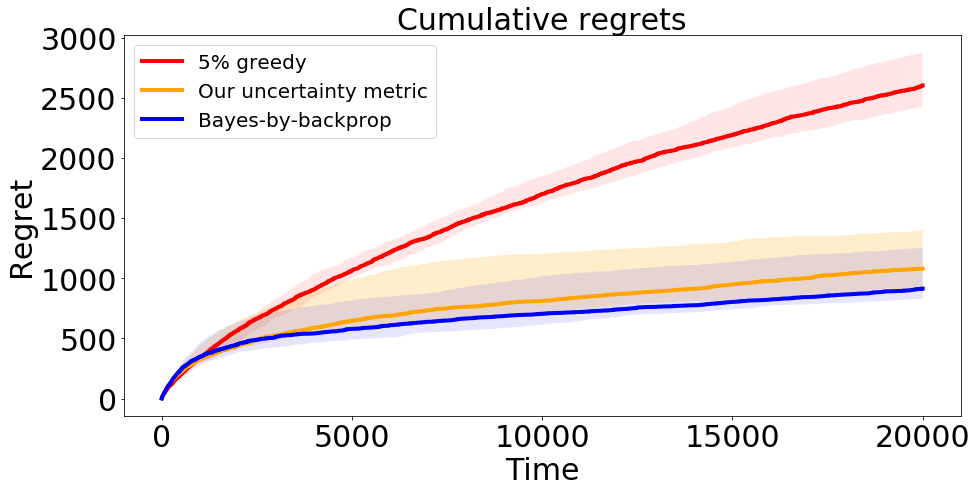

In [4]:

plt.figure(figsize=(15,7))

plt.plot(np.median(results_regret_bandits['eps_greedy'],0), label="5% greedy", linewidth=4, color='red')
plt.fill_between(range(20000), plots['eps_greedy'][0], plots['eps_greedy'][1], facecolor='red', alpha=0.1)


plt.plot(np.median(results_regret_bandits['two_anchored_10'],0), label="Our uncertainty metric", linewidth=4, color='orange')
plt.fill_between(range(20000), plots['two_anchored_10'][0],
                 plots['two_anchored_10'][1], facecolor='orange', alpha=0.2)



plt.plot(np.median(results_regret_bandits['bayes_by_backprop'],0), label="Bayes-by-backprop", linewidth=4, color='blue')
plt.fill_between(range(20000), plots['bayes_by_backprop'][0], plots['bayes_by_backprop'][1], facecolor='blue', 
                alpha=0.1)


plt.xlabel("Time", fontsize=30)
plt.ylabel("Regret", fontsize=30)
plt.xticks([0, 5000, 10000, 15000, 20000], size=30)
plt.yticks(size=30)
plt.legend(prop={'size': 20}, loc=2)
plt.title('Cumulative regrets', size=30)
plt.show()